In [21]:
import numpy as np
import struct

In [71]:
def downsample_dataset(dataset_filename : str, downsample_factor):
    full_keyset = np.fromfile("../data/" + dataset_filename + "_ts_200M_uint64", dtype=np.uint64)[1:]
    reduced_keyset = np.delete(full_keyset, np.arange(0, full_keyset.size, downsample_factor))
    downsampled_keyset = full_keyset[::downsample_factor]
    print("Length of downsampled keyset: ", len(downsampled_keyset))
    
    with open("../data/" + dataset_filename + "_ts_1M_uint64", "wb") as output_file:
        output_file.write(struct.pack("Q", len(downsampled_keyset)))
        downsampled_keyset.tofile(output_file)

In [72]:
#downsample_dataset("wiki", 131072)

Length of downsampled keyset:  1526


## Visualization

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt  
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
def abline(slope, intercept, color, label):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=color, label = label)
    plt.legend()
    plt.xlabel('Keys')
    plt.ylabel('Rank')

In [4]:
def calculate_mean_squared_error(x, y):
    regressor = LinearRegression()
    regressor.fit(x, y) 
    y_pred = regressor.predict(x)
    print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
    # Plot outputs
    plt.scatter(x, y,  color='black')
    abline(regressor.coef_, regressor.intercept_, color="blue", label="Regression line")
    plt.show()

In [5]:
def plot_distribution_of_keys(X):
    # we observe that poisoning keys are densly populated together
    # get range for x-axis by looking at first and last element
    plt.hist(X, bins = 100)
    plt.show()

In [6]:
def plot_cdf(X):
    plt.hist(X, bins = 100, density = True, cumulative=True, label='CDF', histtype='step', alpha=0.55, color='purple')
    plt.show()

In [7]:
"""
Source: Scipy - https://github.com/scipy/scipy/blob/v1.7.0/scipy/stats/stats.py#L8631-L8737
"""
def rankdata(array):
    #arr = np.ravel(np.asarray(array))
    algo = 'mergesort'
    sorter = np.argsort(array, kind=algo)

    inv = np.empty(sorter.size, dtype=np.intp)
    inv[sorter] = np.arange(sorter.size, dtype=np.intp)
    return inv + 1

In [8]:
def read_dataset(dataset_filename : str):
    keyset = np.fromfile("../data/" + dataset_filename, dtype=np.uint64)[1:]
    print("Length of keyset: ", len(keyset))
    rankset = rankdata(keyset)
    keyset = keyset.reshape(-1, 1)
    return (keyset, rankset)

In [13]:
X, y = read_dataset("wiki_ts_200M_uint64")

Length of keyset:  200000000


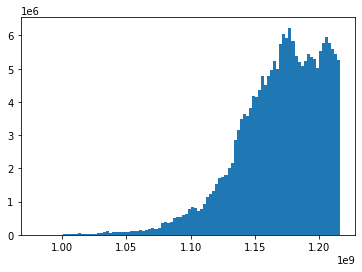

In [14]:
plot_distribution_of_keys(X)

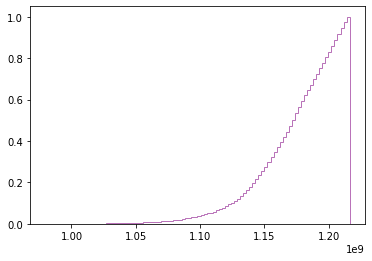

In [15]:
plot_cdf(X)

In [12]:
#calculate_mean_squared_error(X, y)

In [16]:
X_poisoned, y_poisoned = read_dataset("poisoned_wiki_ts_200M_uint64")

Length of keyset:  200020000


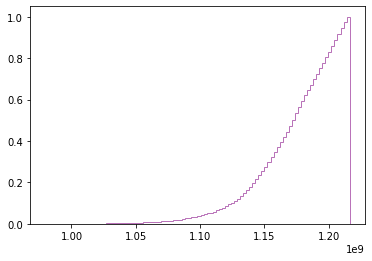

In [17]:
plot_cdf(X_poisoned)

## Experiments

In [18]:
X

array([[ 979672113],
       [ 979672371],
       [ 979676171],
       ...,
       [1216240435],
       [1216240436],
       [1216240436]], dtype=uint64)

In [19]:
X_poisoned

array([[ 979672110],
       [ 979672111],
       [ 979672112],
       ...,
       [1216240435],
       [1216240436],
       [1216240436]], dtype=uint64)

In [20]:
len(X[np.in1d(X, X_poisoned)])

200000000